# Example notebook to show how to work with sxs waveforms

In [1]:
from gw_eccentricity import load_waveform
from gw_eccentricity import measure_eccentricity
from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
# function to load modes from sxs catalog formatted waveform file
load_waveform?

Signature: load_waveform(origin='LAL', **kwargs)
Docstring:
Load waveform.

parameters:
----------
origin: str
    The origin of the waveform to be provided.  This can be one of
    - "LAL": Compute waveform by a call to the LAL-library.
    - "LVCNR": Import waveform by reading a file in the LVCNR-data format.
    - "SXSCatalog": Import waveform by reading a file in the SXS catalog format.
        (see https://data.black-holes.org/waveforms/documentation.html)
    - "EOB": Import EOB waveform generated using SEOBNRv4EHM
        (arxiv:2112.06952).
    - "EMRI": Import EMRI waveform generated by Maarten.
    In each case, the `kwargs` dictionary provides the needed information
    to uniquely specify the waveform.
kwargs:
    Kwargs dictionary to be passed to the waveform loading functions.
    As mentioned above, the dictionary would depend on the `origin`
    of the waveform to be loaded/imported/generated.
    - "LAL": For generating waveform calling the LAL library. See
        `lo

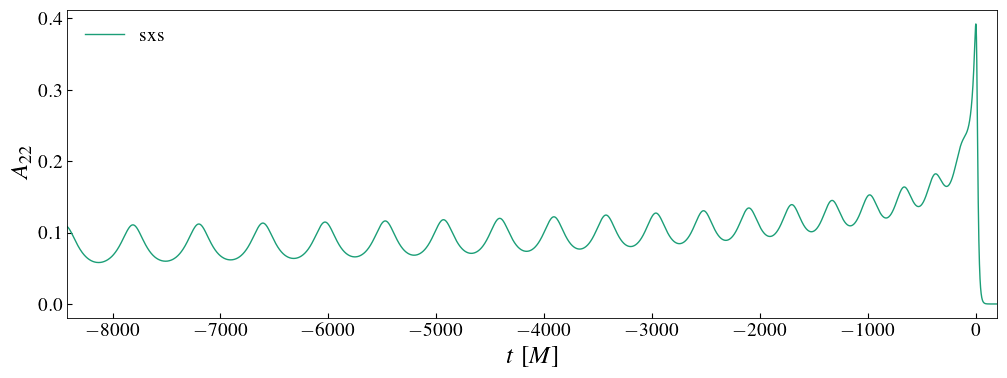

In [3]:
# Load nr data in sxs catalog format using only filepath and using defaults for other args
kwargs = {"filepath": "/home/arif/nr_data/rhOverM_Asymptotic_GeometricUnits_CoM.h5"}
# kwargs = {"filepath": "/home1/md.shaikh/SXS/Private/Ecc1dSur_rerun/046/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5"}

dataDict = load_waveform(origin="SXSCatalog", **kwargs)

# use better defaults for plotting
use_fancy_plotsettings()
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="sxs")
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")

# measure eccentricity using `AmplitudeFits` method

(<Figure size 1200x400 with 1 Axes>,
 <AxesSubplot: xlabel='$t$', ylabel='$e_{\\mathrm{gw}}$'>)

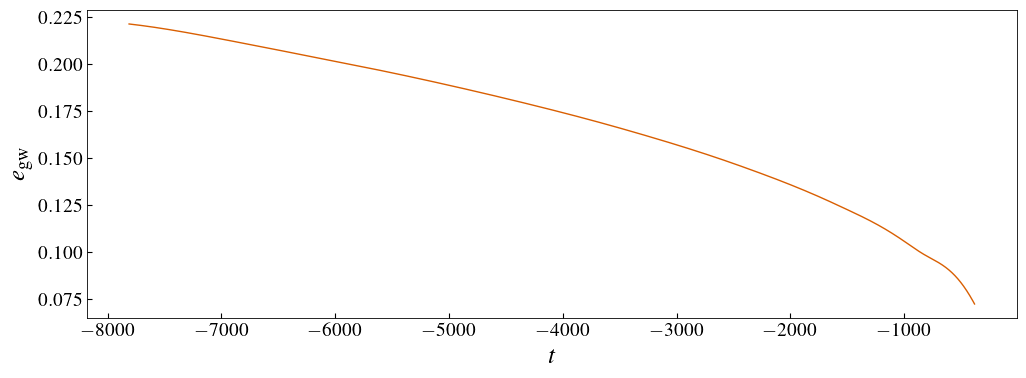

In [4]:
gwecc_dict = measure_eccentricity(tref_in=dataDict["t"],
                                  dataDict=dataDict,
                                  method="AmplitudeFits")
gwecc_obj = gwecc_dict["gwecc_object"]
gwecc_obj.plot_eccentricity()

# Measure eccentricity with `ResidualAmplitude`

This time we need to load zeroecc data as well to compute the residual amplitude. This is done by providing additional kwargs to the waveform laodig function

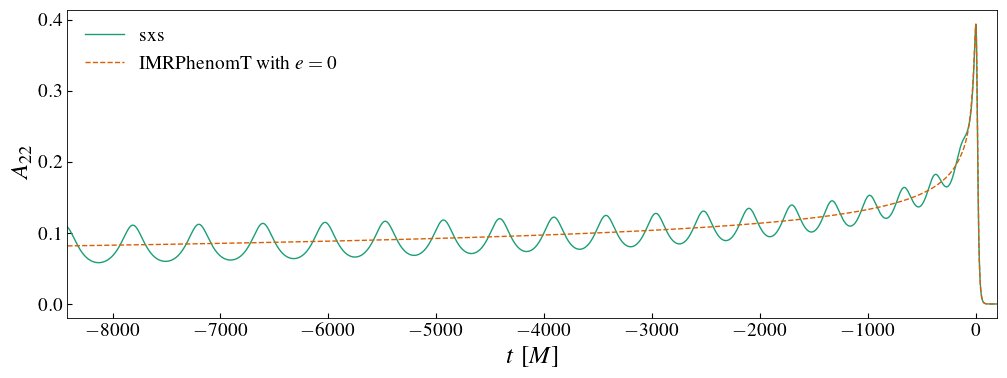

In [5]:
filepath = "/home/arif/nr_data/rhOverM_Asymptotic_GeometricUnits_CoM.h5"
metadata_path = "/home/arif/nr_data/metadata.txt"
# filepath = "/home1/md.shaikh/SXS/Private/Ecc1dSur_rerun/046/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5"
# metadata_path = "/home1/md.shaikh/SXS/Private/Ecc1dSur_rerun/046/Lev3/metadata.txt"
kwargs = {"filepath": filepath,
         "include_zero_ecc": True,
         "metadata_path": metadata_path}
dataDict = load_waveform(origin="SXSCatalog", **kwargs)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="sxs")
ax.plot(dataDict["t_zeroecc"], np.abs(dataDict["hlm_zeroecc"][(2, 2)]), ls="--", label=r"IMRPhenomT with $e=0$")
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")

/home/arif/gw_eccentricity/gw_eccentricity/eccDefinition.py:218: UserWarning: kw params_dict is not a recognized key word in dataDict.
  debug_message(


(<Figure size 1200x400 with 1 Axes>,
 <AxesSubplot: xlabel='$t$', ylabel='$e_{\\mathrm{gw}}$'>)

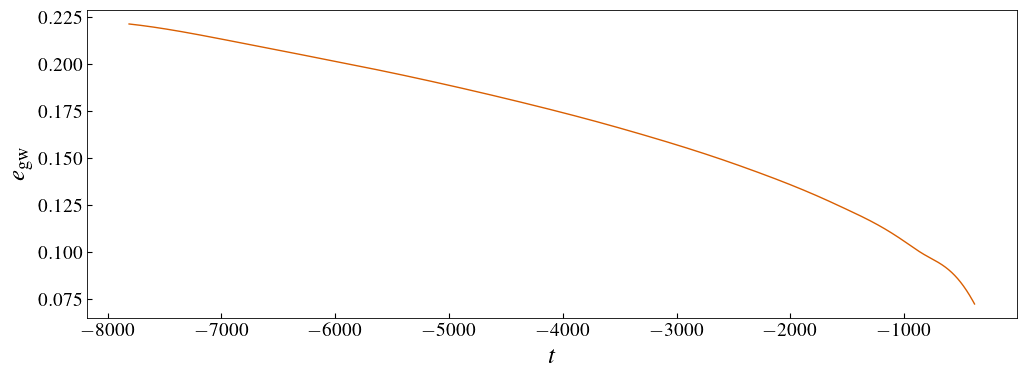

In [6]:
gwecc_dict = measure_eccentricity(tref_in=dataDict["t"],
                                  dataDict=dataDict,
                                  method="ResidualAmplitude")
gwecc_obj = gwecc_dict["gwecc_object"]
gwecc_obj.plot_eccentricity()

# Try loading lvcnr

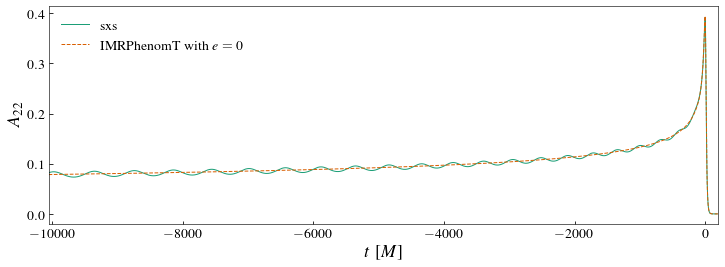

In [11]:
filepath = "/home1/md.shaikh/Eccentricity/data/ecc_waveforms/Non-Precessing/SXS/BBH_SHK_q1_0_0_e01_D20_Res3.h5"
metadata_path = "/home1/md.shaikh/SXS/Private/Ecc1dSur_rerun/046/Lev3/metadata.txt"
kwargs = {"filepath": filepath,
         "include_zero_ecc": True}
dataDict = load_waveform(origin="LVCNR", **kwargs)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="sxs")
ax.plot(dataDict["t_zeroecc"], np.abs(dataDict["hlm_zeroecc"][(2, 2)]), ls="--", label=r"IMRPhenomT with $e=0$")
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")

# Try lvcnr_hack

In [12]:
from gw_eccentricity.load_data import load_lvcnr_hack

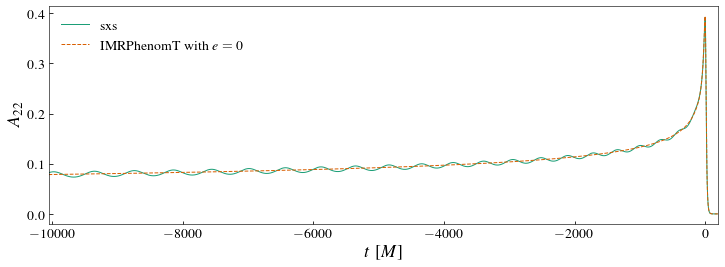

In [15]:
filepath = "/home1/md.shaikh/Eccentricity/data/ecc_waveforms/Non-Precessing/SXS/BBH_SHK_q1_0_0_e01_D20_Res3.h5"
metadata_path = "/home1/md.shaikh/SXS/Private/Ecc1dSur_rerun/046/Lev3/metadata.txt"
kwargs = {"filepath": filepath,
         "include_zero_ecc": True}
dataDict = load_lvcnr_hack(**kwargs)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="sxs")
ax.plot(dataDict["t_zeroecc"], np.abs(dataDict["hlm_zeroecc"][(2, 2)]), ls="--", label=r"IMRPhenomT with $e=0$")
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")